In [1]:
'''TODO Explanation currently not working ! '''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from data import load_data
import os
import sys
from scipy.io import arff
sys.path.insert(0,'./code_LEFTIST/')
from sklearn.utils import check_random_state

from data.load_data import load_basic_dataset
import pickle
from InterpretabilityModels.leftist.LEFTIST import LEFTIST
from InterpretabilityModels.leftist.learning_process.SHAP_learning_process import SHAPLearningProcess
from InterpretabilityModels.leftist.learning_process.LIME_learning_process import LIMELearningProcess
from InterpretabilityModels.leftist.timeseries.segmentator.uniform_segmentator import UniformSegmentator
from InterpretabilityModels.leftist.timeseries.transform_function.mean_transform import MeanTransform
from InterpretabilityModels.leftist.timeseries.transform_function.rand_background_transform import RandBackgroundTransform
from InterpretabilityModels.leftist.timeseries.transform_function.straightline_transform import StraightlineTransform
from ClassificationModels.SVM import timeseriessvc

2022-06-09 11:49:58.910570: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-09 11:49:58.910588: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
dataset='ElectricDevices'

In [3]:
train_x,test_x, train_y, test_y = load_data.load_basic_dataset(dataset,scaling=None,mode='time',cwd='/media/jacqueline/Data/UCRArchive_2018/')

In [ ]:
import tensorflow as tf 
model = tf.keras.models.load_model(f'./ClassificationModels/models/{dataset}/cnn/best_model.hdf5')

In [6]:
explained_instance = train_x[0]
nb_interpretable_feature = 10
explanation_size = 5
nb_neighbors = 1000
learning_process_name = None #'SHAP'
transform_name = 'straight_line' #'mean'

### build explainer

In [7]:
from InterpretabilityModels.leftist.timeseries.segmentator.uniform_segmentator import UniformSegmentator
segmentator = UniformSegmentator(nb_interpretable_feature)
print(segmentator.nb_segments)
leftist = LEFTIST(model,test_x,'time','SK')

10


## Explanations building

In [8]:
explanations = leftist.explain(explained_instance,1000,idx_label=np.argmax(train_y[0]),explanation_size=explanation_size)
print(explanations)
for i in range(len(explanations)):
    print('class{} : '.format(i),explanations[i][0])

Instance (96, 1)
nb_features 10
nb_neighbors 1000
NM [[1 1 1 ... 1 0 0]
 [0 1 1 ... 1 1 0]
 [1 1 1 ... 1 0 1]
 ...
 [0 0 1 ... 0 1 1]
 [1 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 1]]
masks : 
 [[1 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 0]
 [1 1 1 ... 1 0 1]
 ...
 [0 0 1 ... 0 1 1]
 [1 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 1]] 
 kernel_weights : 
 None 
 values : 
 None 
 proba_labels : 
 None 
 
NV [[[-0.18610903]
  [-0.18610903]
  [-0.18610903]
  ...
  [-0.18610903]
  [-0.18610903]
  [-0.18610903]]

 [[-0.1859578 ]
  [-0.1859578 ]
  [-0.1859578 ]
  ...
  [-0.1859578 ]
  [-0.1859578 ]
  [-0.1859578 ]]

 [[-0.18610903]
  [-0.18610903]
  [-0.18610903]
  ...
  [-0.18610903]
  [-0.18610903]
  [-0.18610903]]

 ...

 [[ 2.4781741 ]
  [ 2.4781741 ]
  [ 2.4781741 ]
  ...
  [-0.18610903]
  [-0.18610903]
  [-0.18610903]]

 [[-0.18610903]
  [-0.18610903]
  [-0.18610903]
  ...
  [-0.95415757]
  [ 1.0371278 ]
  [-0.95415757]]

 [[-0.18610903]
  [-0.18610903]
  [-0.18610903]
  ...
  [-0.18610903]
  [-0.18610903]
  [-0.18610

In [9]:
#TODO
leftist.plot(np.array([test_x[0,:,:]]),explanations)

TypeError: plot() takes 0 positional arguments but 3 were given

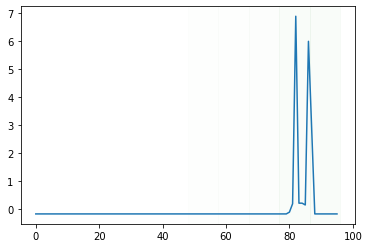

In [10]:
'''TODO Visualizations

* Include average of the counter class?
* does this make sense ?  
'''
import matplotlib.pyplot as plt

values_per_slice=len(explained_instance)/10
step=0
plt.Figure()
plt.plot(explained_instance)
for i in range(0,len(explanations[0][0])):
    weight=explanations[0][0][i]
    start = i * values_per_slice
    end = start + values_per_slice
    color = 'red' if weight < 0 else 'green'
    plt.axvspan(start, end, color=color, alpha=abs(weight * 2))

plt.show()